# start with importing all the data and packages needed

In [1]:
#load all the relevant packages
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib as plt

In [2]:
os.getcwd()

'C:\\Users\\cecilianatalie.strom\\GitHub\\INSA\\Opensanctions\\Clean'

In [3]:
maps = pd.read_csv('eu_map.csv',low_memory=False)

# import trigger data

In [4]:
#load trigger data
conflict = pd.read_csv('IV\\ucdp_cleaned.csv')
conflict_os = pd.read_csv('IV\\ucdp_os.csv')
coup= pd.read_csv('IV\\coup_data.csv')
terror= pd.read_csv('IV\\data_gti.csv')
protest= pd.read_csv('IV\\acled_clean.csv')

# EU FSF list

**descriptives**

In [5]:
data = maps.copy()
#get column names
print(data.columns)
print(data.describe())
print(data.schema.unique())
print(data.month.unique())
print(data.month.nunique())

print(data.date_stamp.unique())
print(data.date_stamp.nunique())
# receive information on missing values/ null values
is_null = data.isnull().sum()
print(is_null)


Index(['Unnamed: 0.1', 'Unnamed: 0', 'id', 'schema', 'name', 'aliases',
       'birth_date', 'countries', 'addresses', 'identifiers', 'sanctions',
       'phones', 'emails', 'dataset', 'date_stamp', 'last_change',
       'listing_date', 'delisting_date', 'month', 'new_listing_count',
       'listing_count', 'year_id', 'month_id'],
      dtype='object')
       Unnamed: 0.1  Unnamed: 0  birth_date  countries  addresses  phones  \
count    134.000000  134.000000         0.0        0.0        0.0     0.0   
mean      66.500000   66.500000         NaN        NaN        NaN     NaN   
std       38.826537   38.826537         NaN        NaN        NaN     NaN   
min        0.000000    0.000000         NaN        NaN        NaN     NaN   
25%       33.250000   33.250000         NaN        NaN        NaN     NaN   
50%       66.500000   66.500000         NaN        NaN        NaN     NaN   
75%       99.750000   99.750000         NaN        NaN        NaN     NaN   
max      133.000000  133.0000

In [6]:
data = data.sort_values(by=['month'])

In [7]:
data = data.drop(['Unnamed: 0.1', 'Unnamed: 0'],axis= 'columns')
data

,id,schema,name,aliases,birth_date,countries,addresses,identifiers,sanctions,phones,...,dataset,date_stamp,last_change,listing_date,delisting_date,month,new_listing_count,listing_count,year_id,month_id
66,NK-ZSSebjH9yRgcpaf5Y5CWNp,Person,Abdulqader Mohammed AL-BAGHDADI,NaN,NaN,NaN,NaN,NaN,"""""",NaN,...,EU Sanctions Map,20220510,NaN,20220510,NaN,2022-05,83,83,2022,2
77,NK-cbdckShLMCD5SbjPm6itqc,Vessel,RUNG RA 2,NaN,NaN,NaN,NaN,9020534,"""""",NaN,...,EU Sanctions Map,20220510,NaN,20220510,NaN,2022-05,83,83,2022,2
76,NK-cS9xitXcWHjYumgnMjDMeB,LegalEntity,Alfa Bank,NaN,NaN,NaN,NaN,NaN,"""""",NaN,...,EU Sanctions Map,20220510,NaN,20220510,NaN,2022-05,83,83,2022,2
75,NK-cS4PYWrNuW9AF7XNCpL9oS,LegalEntity,ALMAZ-ANTEY,Almaz-Antey,NaN,NaN,NaN,NaN,"""""",NaN,...,EU Sanctions Map,20220510,NaN,20220510,NaN,2022-05,83,83,2022,2
74,NK-cDtAzPbNaYCiiQfCtHQtY6,LegalEntity,JSC PO Sevmash,JSC PO SEVMASH,NaN,NaN,NaN,NaN,"""""",NaN,...,EU Sanctions Map,20220510,NaN,20220510,NaN,2022-05,83,83,2022,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,NK-BVqo6qCdREbompfYArsMyN,LegalEntity,Oriental Review,NaN,NaN,NaN,NaN,NaN,"""""",NaN,...,EU Sanctions Map,20230705,2023-07-04T12:03:21,20230705,NaN,2023-07,7,7,2023,6
117,eu-sancmap-7c6038b264645d41b2ce9c9e84364f12800...,LegalEntity,Oriental Review,NaN,NaN,NaN,NaN,NaN,"""""",NaN,...,EU Sanctions Map,20230704,2023-07-04T12:03:21,20230704,20230704.0,2023-07,7,7,2023,6
26,NK-GwtovCwQLJ7PeGx9ASF4wb,Vessel,TONG SAN 2,NaN,NaN,NaN,NaN,445539000;8937675,"""""",NaN,...,EU Sanctions Map,20230814,2023-04-20T12:14:15,20230814,NaN,2023-08,3,3,2023,7
101,NK-nadYn652PLpsoCSPrtJMLN,Vessel,JIE SHUN,NaN,NaN,NaN,NaN,514569000;8518780,"""""",NaN,...,EU Sanctions Map,20230817,2023-04-20T12:14:15,20230817,NaN,2023-08,3,3,2023,7


In [8]:
print(data.listing_count.unique())

[83 15 12  2 10  7  3]


In [9]:
#get the number of listings per month
listing_month = data.groupby('month').new_listing_count.sum()
listing_month

month
2022-05    6889
2022-06     225
2022-07     144
2022-11       4
2023-03     100
2023-04       4
2023-07      49
2023-08       9
Name: new_listing_count, dtype: int64

In [10]:
data['listing_month'] = data['new_listing_count'].groupby(data['month']).transform('sum')

In [11]:
print(data.listing_month.unique())

[6889  225  144    4  100   49    9]


Text(0.5, 1.0, 'Accumulated monthly listings EU FSF')

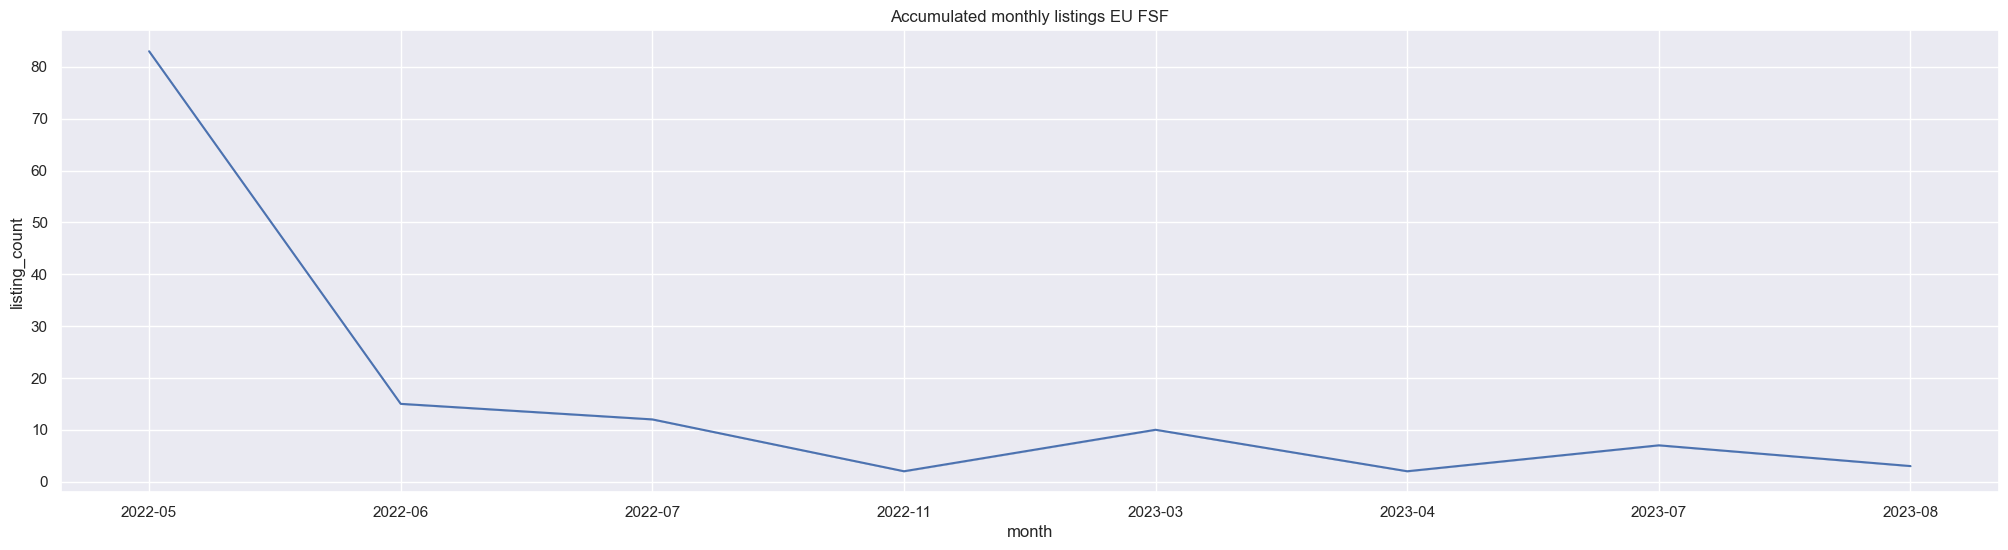

In [12]:
#get the total listings per month
data = data[data['month'] > '2021-09']
sns.set(rc={"figure.figsize":(25, 6)}) #width=3, #height=4
listings_eu_fsf = sns.lineplot(data=data,x='month',y='listing_count').set_title('Accumulated monthly listings EU FSF')
listings_eu_fsf.figure.savefig('listings_eu_map')
listings_eu_fsf

Text(0.5, 1.0, 'New monthly listings EU Sanctions Map')

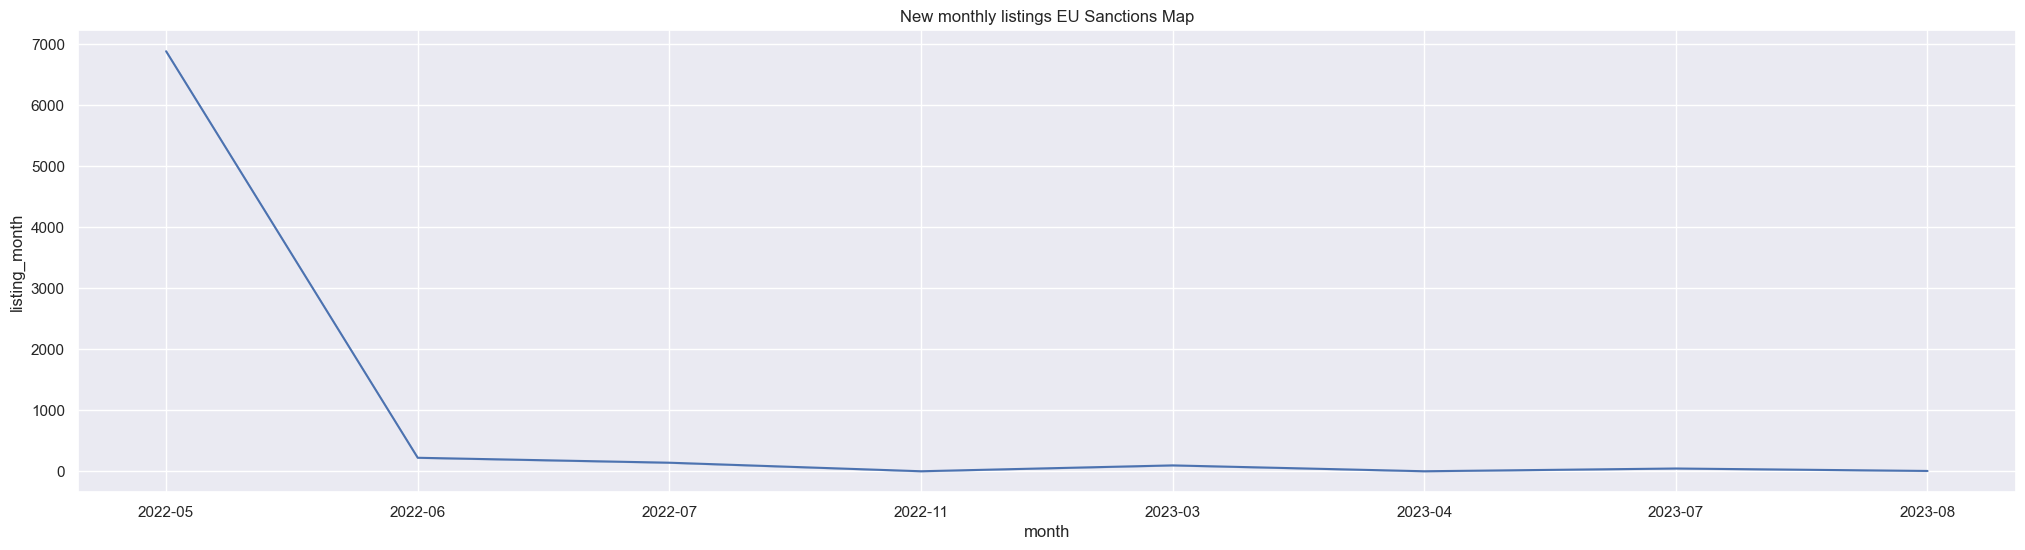

In [13]:
#get the total listings per month
sns.set(rc={"figure.figsize":(25, 6)}) #width=3, #height=4
listings_eu_fsf = sns.lineplot(data=data,x='month',y='listing_month').set_title('New monthly listings EU Sanctions Map')
listings_eu_fsf.figure.savefig('new_listings_eu_map')
listings_eu_fsf

In [14]:
#get the sates with the most new listings
data['listing_date'].value_counts().nlargest(10)

listing_date
20220510    82
20220617     7
20230309     7
20220712     6
20230704     5
20220620     4
20230310     3
20221109     2
20230705     2
20230421     2
Name: count, dtype: int64

In [15]:
#get the top shema
data['schema'].value_counts().nlargest(5)

schema
LegalEntity    83
Vessel         41
Person         10
Name: count, dtype: int64

In [16]:
#get the top sanctions regime
data['sanctions'].value_counts().nlargest(15)

sanctions
""                                                                                                                                                                                                                                                                                              101
M/V JIN HYE engaged in a ship-to-ship transfer with M/V CHON MA SAN on 16 December 2017.                                                                                                                                                                                                          2
Ahmoudou Ag Asriw is a senior commander of the Groupe autodéfense touareg Imghad et allies (GATIA) and has in this capacity been involved in leading drug convoys in northern Mali at least since October 2016, as well as ceasefire violations in Kidal region in July 2017 and April 2018.      2
DPRK oil tanker M/V SAM MA 2 imported refined petroleum products in October, early November and mid-November 2017 

# add trigger events

In [17]:
conflict.describe
# get a month id
conflict['month'] = pd.to_datetime(conflict['conflict_event']).dt.to_period('M')
conflict_os['month'] = pd.to_datetime(conflict_os['conflict_event']).dt.to_period('M')

In [18]:
print(conflict.columns)
conflict = conflict.sort_values(by=['month'])
print(conflict)
print(conflict_os.columns)
conflict_os = conflict_os.sort_values(by=['month'])
print(conflict_os)
print(protest.columns)
protest = protest.sort_values(by=['month'])
print(protest)
print(coup.columns)
coup=coup.sort_values(by=['month'])
coup['month'] = pd.to_datetime(coup['coup_event']).dt.to_period('M')
print(coup)
print(terror.columns)
terror=terror.sort_values(by=['year'])
print(terror)

Index(['Unnamed: 0', 'id', 'relid', 'year', 'type_of_violence', 'country',
       'country_id', 'fatality_best_estimate', 'gwnoa', 'gwnob',
       'conflict_event', 'iso', 'month'],
      dtype='object')
      Unnamed: 0      id                 relid  year  type_of_violence  \
1507       85255  327584    DRC-2020-2-15650-0  2020               2.0   
1872       85722  325549    DRC-2020-3-16065-4  2020               3.0   
1873       85723  327127    DRC-2020-3-16065-5  2020               3.0   
1542       85310  325162    DRC-2020-2-15892-0  2020               2.0   
997        83689  377179   DRC-2020-1-10509-21  2020               1.0   
...          ...     ...                   ...   ...               ...   
957        83165  460439    DRC-2022-3-2434-27  2022               3.0   
956        83164  460230    DRC-2022-3-2434-26  2022               3.0   
894        81915  460094    AFG-2022-3-973-669  2022               3.0   
2798       86694  460325    DRC-2022-2-17417-5  2022    

**now plot the association**

In [19]:
#transfrom month to string
conflict['month'] = conflict['month'].astype(str)
#conflict['month'] = pd.to_datetime(conflict['month'])
conflict.month.dtypes

conflict_os['month'] = conflict_os['month'].astype(str)
conflict_os.month.dtypes

protest['month'] = protest['month'].astype(str)
protest.month.dtypes
coup['month'] = coup['month'].astype(str)
coup.month.dtypes

dtype('O')

In [20]:
#get the new listings per month toether with conflict fatalities and protest events and coups
# combined plot
grouped_1 = data.groupby(['month']).agg({'new_listing_count': 'sum'})
grouped_2 = conflict.groupby(['month']).agg({'fatality_best_estimate': 'sum'})
grouped_3 = conflict_os.groupby(['month']).agg({'fatality_best_estimate': 'sum'})
grouped_4 = protest.groupby(['month']).agg({'event_count': 'sum'})
grouped_5 = coup.groupby(['month']).agg({'coup_summed': 'sum'})
grouped_1 = grouped_1.reset_index()
grouped_2 = grouped_2.reset_index()
grouped_3 = grouped_3.reset_index()
grouped_4 = grouped_4.reset_index()
grouped_5 = grouped_5.reset_index()

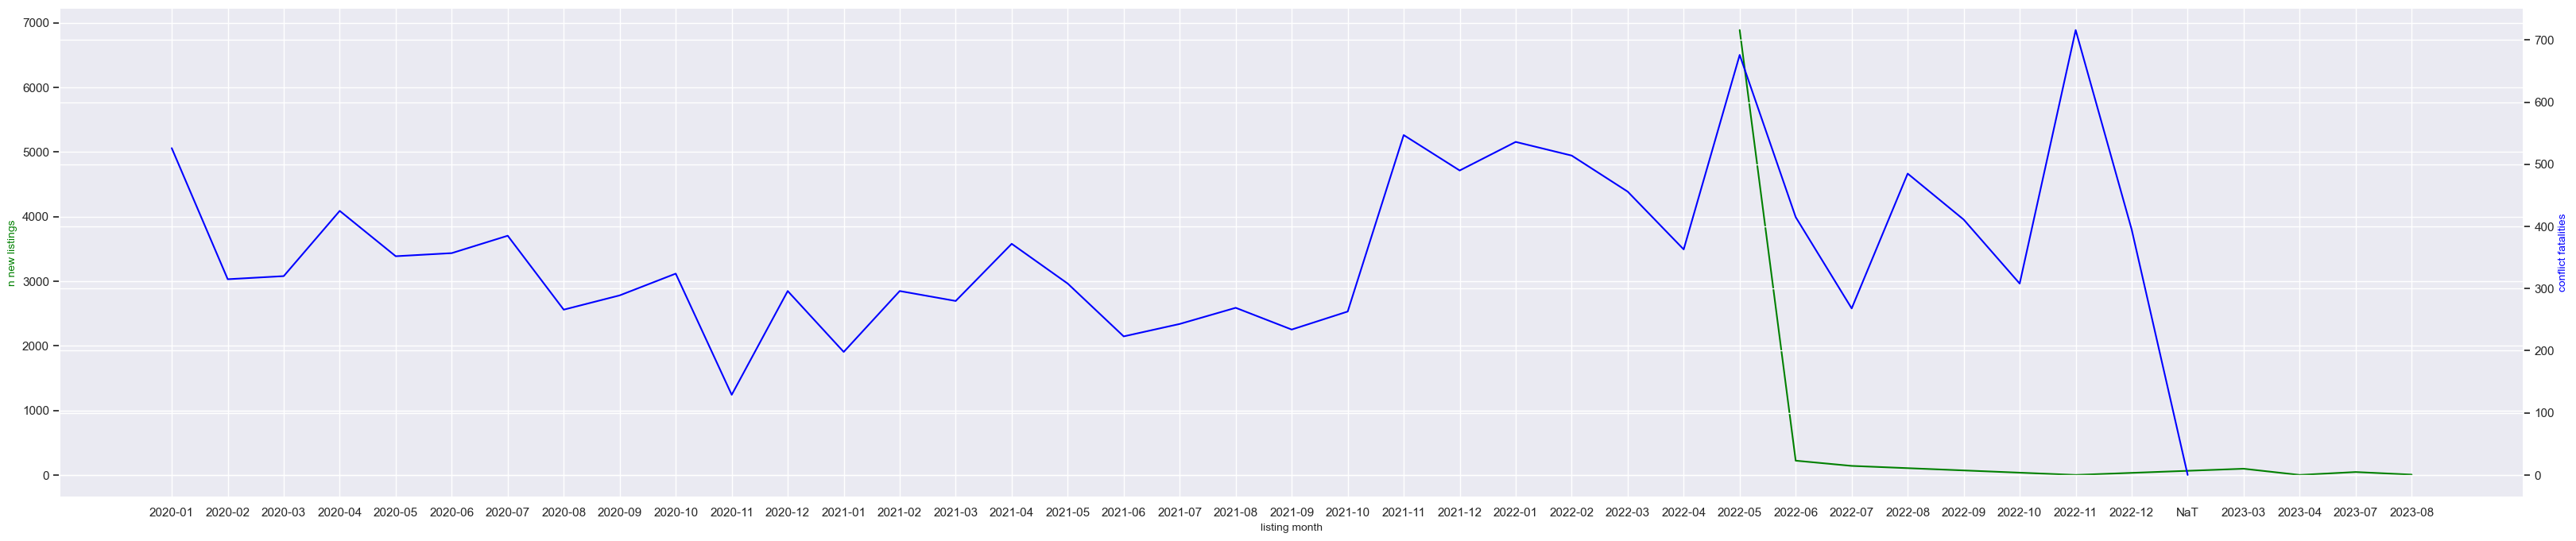

In [21]:
# create figure and axis objects with subplots()
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
fig,ax = plt.subplots(figsize=(40,8))
# make a plot
ax.plot(grouped_1.month,
        grouped_1.new_listing_count,
        color="green")
# set x-axis label
ax.set_xlabel("listing month", fontsize = 10)
# set y-axis label
ax.set_ylabel("n new listings",
              color="green",
              fontsize=10)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(grouped_2.month, grouped_2["fatality_best_estimate"],color="blue")
ax2.set_ylabel("conflict fatalities",color="blue",fontsize=10)
plt.savefig('timetrend_eu_map_combined_conflict.png')
plt.show()

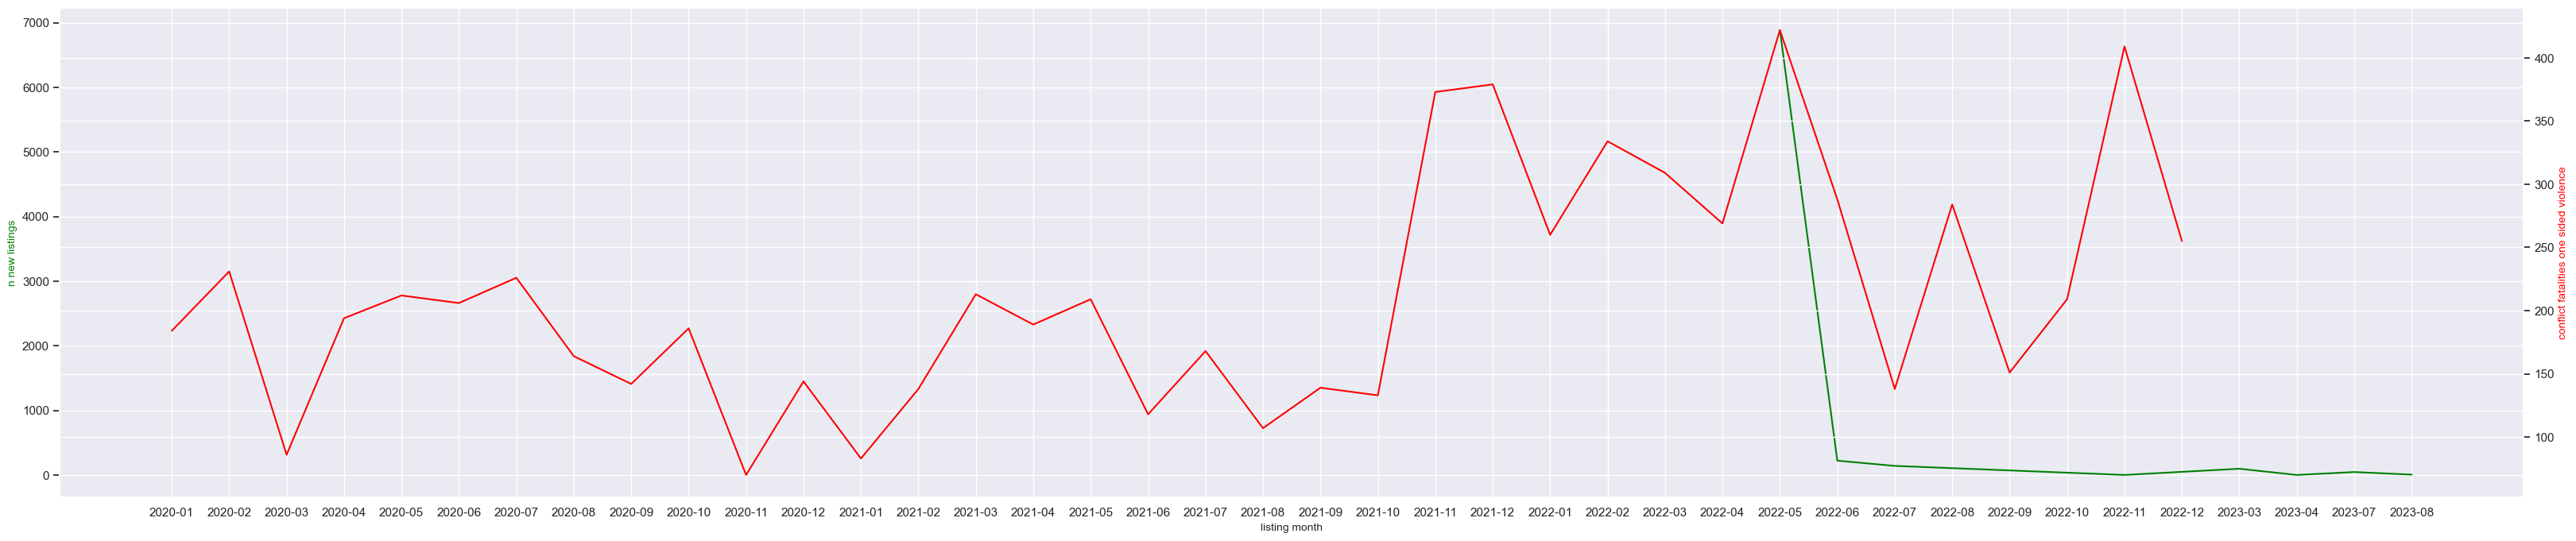

In [22]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(40,8))
# make a plot
ax.plot(grouped_1.month,
        grouped_1.new_listing_count,
        color="green")
# set x-axis label
ax.set_xlabel("listing month", fontsize = 10)
# set y-axis label
ax.set_ylabel("n new listings",
              color="green",
              fontsize=10)
# twin object for two different y-axis on the sample plot
ax3=ax.twinx()
# make a plot with different y-axis using second axis object
ax3.plot(grouped_3.month, grouped_3["fatality_best_estimate"],color="red")
ax3.set_ylabel("conflict fatalities one sided violence",color="red",fontsize=10)
plt.savefig('timetrend_eu_map_combined_conflict_os.png')

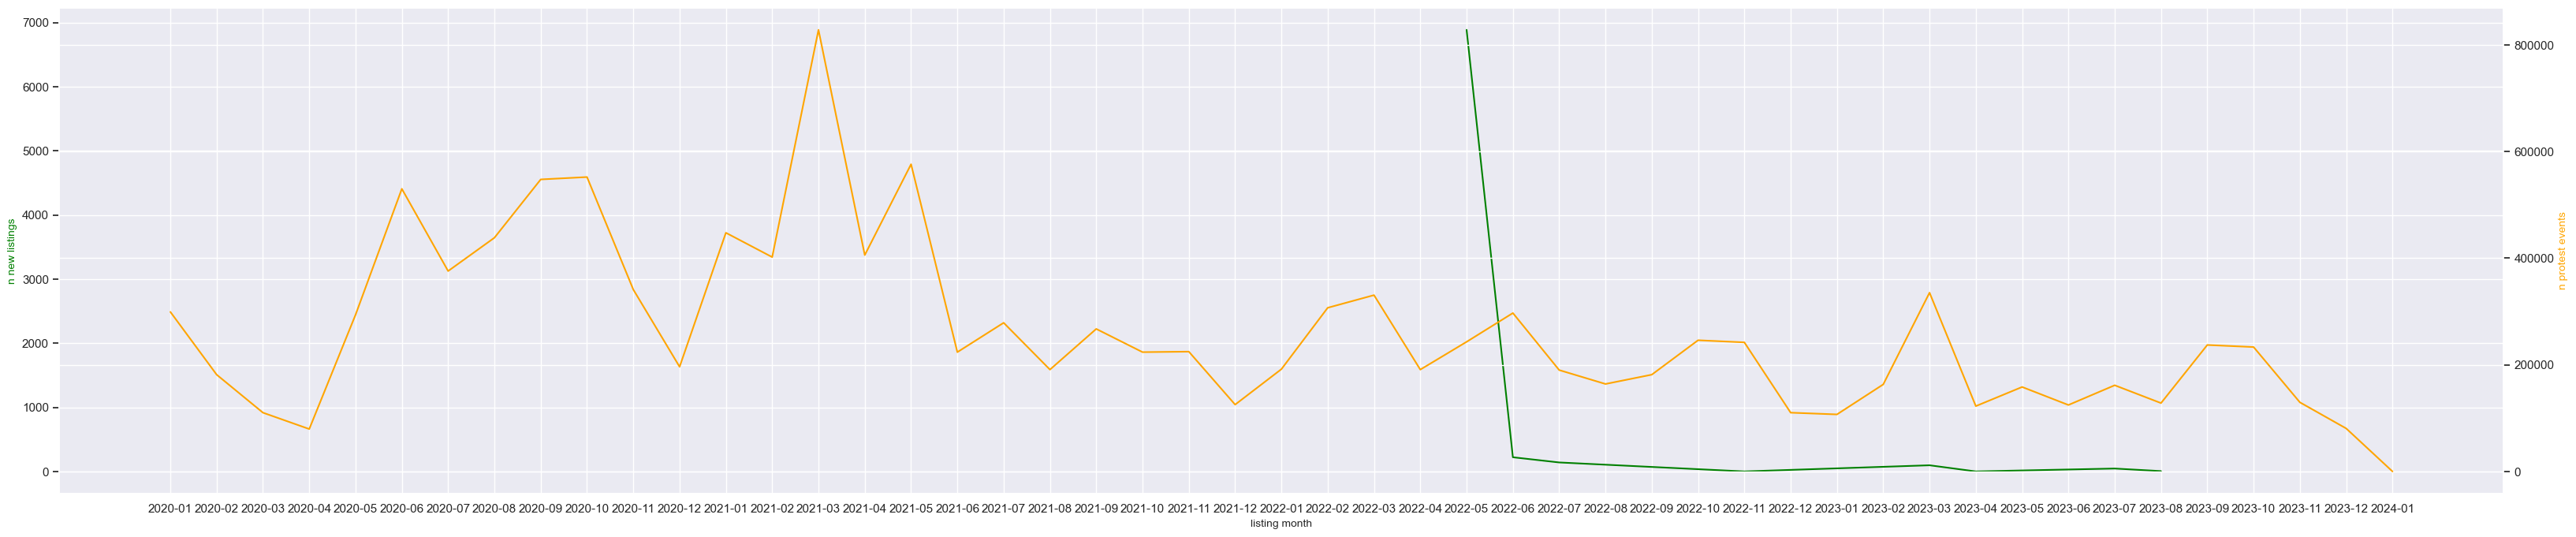

In [23]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(40,8))
# make a plot
ax.plot(grouped_1.month,
        grouped_1.new_listing_count,
        color="green")
# set x-axis label
ax.set_xlabel("listing month", fontsize = 10)
# set y-axis label
ax.set_ylabel("n new listings",
              color="green",
              fontsize=10)
# twin object for two different y-axis on the sample plot
ax4=ax.twinx()
# make a plot with different y-axis using second axis object
ax4.plot(grouped_4.month, grouped_4["event_count"],color="orange")
ax4.set_ylabel("n protest events",color="orange",fontsize=10)
plt.savefig('timetrend_eu_map_combined_protest.png')

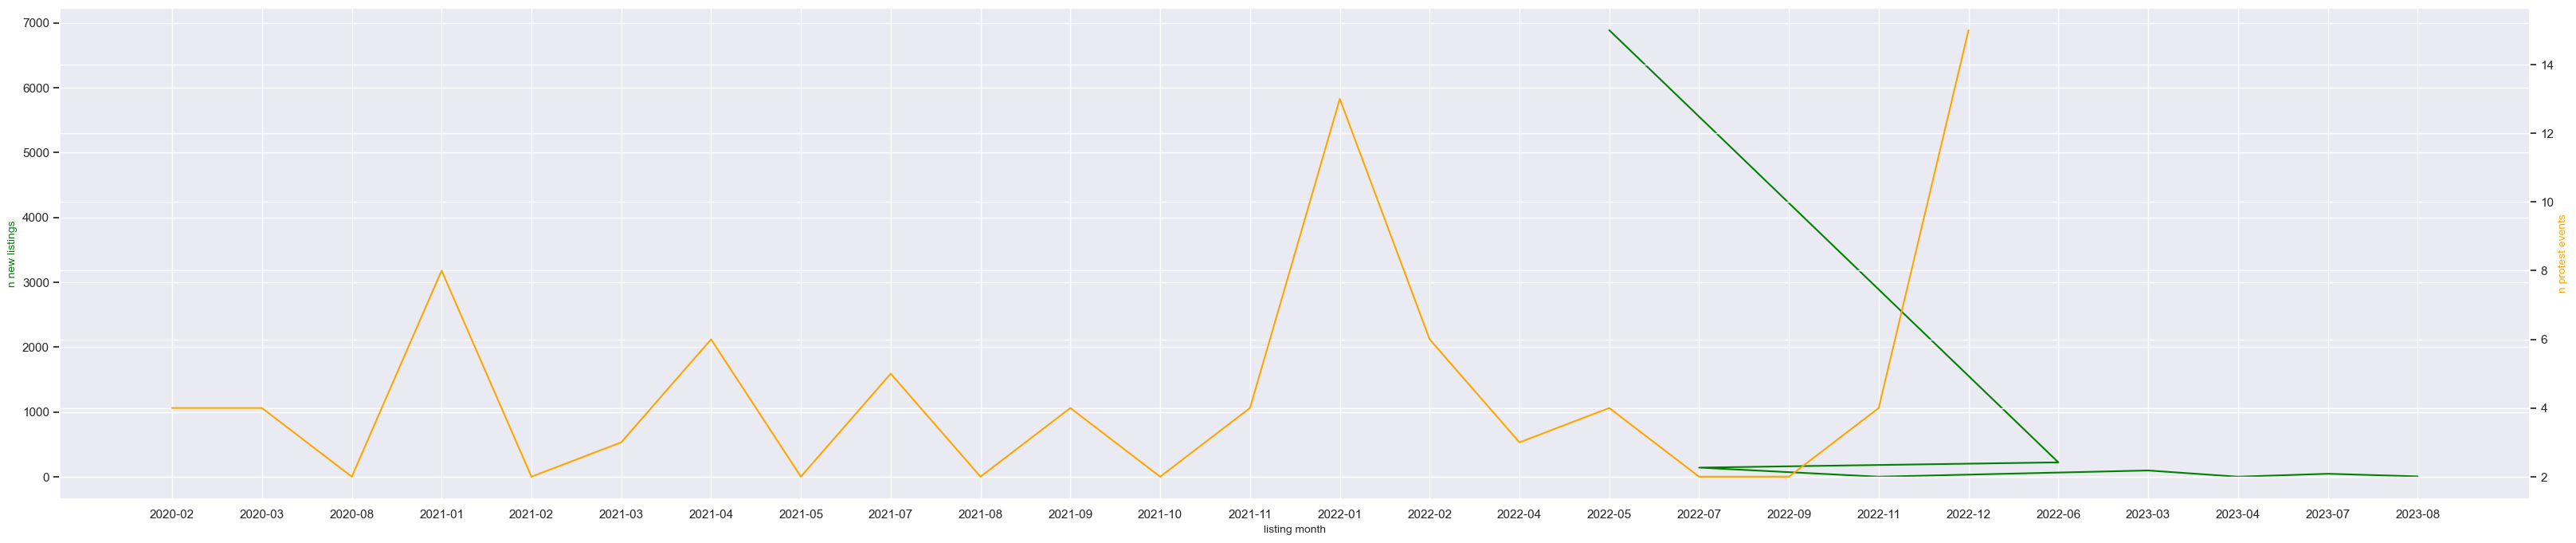

In [24]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(40,8))
# make a plot
ax.plot(grouped_1.month,
        grouped_1.new_listing_count,
        color="green")
# set x-axis label
ax.set_xlabel("listing month", fontsize = 10)
# set y-axis label
ax.set_ylabel("n new listings",
              color="green",
              fontsize=10)
# twin object for two different y-axis on the sample plot
ax5=ax.twinx()
# make a plot with different y-axis using second axis object
ax5.plot(grouped_5.month, grouped_5["coup_summed"],color="orange")
ax5.set_ylabel("n protest events",color="orange",fontsize=10)
plt.savefig('timetrend_ofac_cons_combined_coups.png')

**start analysis**

In [25]:
#filter the listings
data = data.copy()
data = data[data['month'] < '2023-01']
data.month.unique()
#filter the trigger events
conflict = conflict.copy()
conflict = conflict[conflict['month'] > '2021-09']
print(conflict.month.unique())

conflict_os = conflict_os.copy()
conflict_os = conflict_os[conflict_os['month'] > '2021-09']
print(conflict_os.month.unique())

protest = protest.copy()
protest = protest[protest['month'] > '2021-09']
protest = protest[protest['month'] < '2023-01']
print(protest.month.unique())

coup = coup.copy()
coup = coup[coup['month'] > '2021-09']
print(coup.month.unique())

['2021-10' '2021-11' '2021-12' '2022-01' '2022-02' '2022-03' '2022-04'
 '2022-05' '2022-06' '2022-07' '2022-08' '2022-09' '2022-10' '2022-11'
 '2022-12' 'NaT']
['2021-10' '2021-11' '2021-12' '2022-01' '2022-02' '2022-03' '2022-04'
 '2022-05' '2022-06' '2022-07' '2022-08' '2022-09' '2022-10' '2022-11'
 '2022-12']
['2021-10' '2021-11' '2021-12' '2022-01' '2022-02' '2022-03' '2022-04'
 '2022-05' '2022-06' '2022-07' '2022-08' '2022-09' '2022-10' '2022-11'
 '2022-12']
['2022-01' '2022-02' '2022-04' '2022-05' '2022-07' '2022-09' '2021-10'
 '2021-11' '2022-11' '2022-12']


In [27]:
import scipy
from scipy import stats
import statsmodels
#conflict fatalities
print('conflict')
# Step 1: Perform a t-test
t_statistic, p_value = stats.ttest_ind(conflict.dropna()['fatality_best_estimate'],data.dropna()['listing_month'])
# Print the results of the t-test
print("T-Test Results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Step 2: Perform ANOVA
f_statistic, p_value_anova = stats.f_oneway(conflict['fatality_best_estimate'],data['listing_month'])

# Print the results of ANOVA
print("\nANOVA Results:")
print("F-statistic:", f_statistic)
print("P-value (ANOVA):", p_value_anova)

#one-sided violence
print('one-sided violence')
# Step 1: Perform a t-test
t_statistic, p_value = stats.ttest_ind(conflict_os.dropna()['fatality_best_estimate'],data.dropna()['listing_month'])
# Print the results of the t-test
print("T-Test Results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Step 2: Perform ANOVA
f_statistic, p_value_anova = stats.f_oneway(conflict_os['fatality_best_estimate'],data['listing_month'])

# Print the results of ANOVA
print("\nANOVA Results:")
print("F-statistic:", f_statistic)
print("P-value (ANOVA):", p_value_anova)

#protest events
print('Protest')
# Step 1: Perform a t-test
t_statistic, p_value = stats.ttest_ind(protest.dropna()['event_count'],data.dropna()['listing_month'])
# Print the results of the t-test
print("T-Test Results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Step 2: Perform ANOVA
f_statistic, p_value_anova = stats.f_oneway(protest['event_count'],data['listing_month'])

# Print the results of ANOVA
print("\nANOVA Results:")
print("F-statistic:", f_statistic)
print("P-value (ANOVA):", p_value_anova)

#coup events
print('Coup')
# Step 1: Perform a t-test
t_statistic, p_value = stats.ttest_ind(coup.dropna()['coup_summed'],data.dropna()['listing_month'])
# Print the results of the t-test
print("T-Test Results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Step 2: Perform ANOVA
f_statistic, p_value_anova = stats.f_oneway(coup['coup_summed'],data['listing_month'])

# Print the results of ANOVA
print("\nANOVA Results:")
print("F-statistic:", f_statistic)
print("P-value (ANOVA):", p_value_anova)

conflict
T-Test Results:
T-statistic: nan
P-value: nan

ANOVA Results:
F-statistic: nan
P-value (ANOVA): nan
one-sided violence
T-Test Results:
T-statistic: nan
P-value: nan

ANOVA Results:
F-statistic: 2897.918569094937
P-value (ANOVA): 2.9248215199604924e-305
Protest
T-Test Results:
T-statistic: nan
P-value: nan

ANOVA Results:
F-statistic: 17028.77157538788
P-value (ANOVA): 0.0
Coup
T-Test Results:
T-statistic: nan
P-value: nan

ANOVA Results:
F-statistic: 51.28482841913465
P-value (ANOVA): 5.7219306638925056e-11
